In [2]:
# 패키지 관리; 필요한 라이브러리 추가 등

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
    # matplotlib의 기본 scheme이 아닌 seaborn scheme 세팅
    # 일일이 그래프 폰트 크기 지정 필요 없이 seaborn의 폰트 스케일 사용

#ignore warnings
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# 원리 찾아보기 >> 해당 건 누락 시 그래프가 제대로 표시되지 않는 경우 있음

필요 프로세스  
+ 1. 데이터셋 확인 - null data 확인 및 수정  
+ 2. 탐색적 데이터 분석 (exploratory data analysis) - feature 개별 분석 / 상관관계 확인, 시각화 툴 사용하여 인사이트 발굴  
+ 3. Feature engineering - 모델 성능 향상 목적; one-hot encoding, class 및 구간으로 나누기, 텍스트 데이터 처리  
+ 4. 모델 만들기 - sklearn 사용, 모델 생성 / sklearn; 사용하여 수많은 알고리즘을 일관된 문법으로 사용 (딥러닝을 위해 tensorflow, pytorch 등 사용 가능)  
+ 5. 모델 학습 및 예측 - train set으로 모델 학습 후 test set으로 예측  
+ 6. 모델 평가 - 예측 성능 수준 판단 / 문제에 따라 모델 평가 방식 상이  

## 1. Dataset 확인
#### - pandas: 파이썬에서 테이블화된 데이터 다루는 데 최적화/많이 쓰이는 라이브러리
#### - pandas 사용, 데이터셋의 간단한 통계적 분석, 복잡한 처리를 간단한 메소드 사용하여 진행
#### 캐글 데이터 셋은 보통 train과 test set 존재

In [6]:
df_train = pd.read_csv('C:/Python/00 Study/001_Titanic_Exploratory data analysis, visualization, machine learning/titanic/train.csv')
df_test = pd.read_csv('C:/Python/00 Study/001_Titanic_Exploratory data analysis, visualization, machine learning/titanic/test.csv')
    # pandas로 저장된 데이터 셋 불러오기
    # df = dataframe 데이터 프레임 (판다스 이용, 데이터를 표 형태로 처리)

In [66]:
   # train 데이터프레임 미리보기 (첫 5줄)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Feature =Pclass, Age, SibSp, Parch, Fare
#### Target label = Survived

In [67]:
df_train.describe()
    # pandas 데이터프레임 상 describe() 메소드로 각 feature가 가진 통계치 반환_train set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
df_test.describe()
    # pandas 데이터프레임 상 describe() 메소드로 각 feature가 가진 통계치 반환_test set

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 2개 테이블 모두 feature count 상 불일치하는 숫자 확인 > null data 존재

In [70]:
    # Train set vs. test set  
    # 두개의 데이터셋이 존재하는 이유 및 목적  
    #***데이터 셋을 나누는 기준 --> 임의로 지정할 수 가능
    # 딥러닝에서 신경망 모델 학습/평가를 위해 데이터셋 필요  
    # 성질에 따라 다음과 같이 분류; 각 타입은 모델 학습/검증/평가를 위해 상이한 목적을 지님  
    # 1. Train set: 모델 학습용 데이터셋  
    # 모델 학습하는데 유일하게 사용되는 데이터셋 / 보통 각기 다른 모델 (hidden layer/hyper parameter 변화) 을 다른 epoch로 학습  
    # 2. Validation set: 학습 완료된 모델 검증용 데이터셋 (학습에 관여)  
    # 3. Test set: 학습/검증 완료된 모델 성능 평가용 데이터셋 (학습에 관여 x, 최종 성능 평가용)  
    # 일반적으로 Train : Test = 8 : 2 --> 일부 Train을 Validation으로 사용 --> Train : Val : Test = 6 : 2 : 2  

### 1.1 Null data check

In [103]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    # NaN (Not-A-Number) = None = Null
    # Train set의 각 열 별로 % NaN 확인
    # for문 사용
    # {:>10} 오른쪽 정렬; {0} 값을 10자리로 표현
    # {:.2f} 소수 둘째짜리까지 출력
    # df_train[col].isnull().sum() 해당 열의 결측치 개수 합
    # TRUE=1; 결측치, FALSE=0으로 계산
    # df_train[col].shape[0] 해당 열의 차원(열이 지정되어 있으므로 행의 개수 보여줌) = 전체 데이터
    # shape의 자체가 tuple 형태, shape[0] = 행의개수 / shape[1] = 열의 개수 설정
    # 100 * (결측치 / 전체데이터) --> % 출력

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%
column: FamilySize	 Percent of NaN value: 0.00%


In [72]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)
    # Test set의 각 열 별로 % NaN 확인

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


#### Train, test set 에서 Age (둘 다 ~20%), Cabin (둘 다 ~80%), Embarked(Train 만 0.22%) null data 존재
#### msno 라이브러리 사용 > null data 존재 확인 용이

<AxesSubplot:>

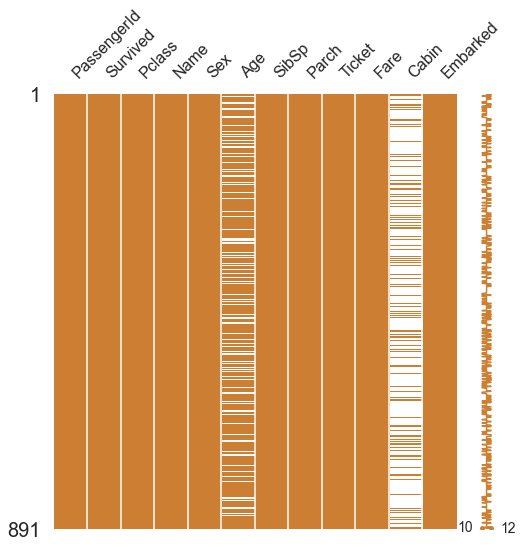

In [73]:
msno.matrix(df=df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))
    # msno: 결측 데이터 파악 시 직관적인 도움 제공
    # df_train으로 지정한 트레인 데이터셋에 대한 결측치를 매트릭스로 시각화
    # iloc = integer location / 데이터프레임의 행, 열 순서를 나타내는 정수
    # figsize = 그래프 크기 = (가로, 세로)
    # color RGB 조절하여 그래프 색상 선택

<AxesSubplot:>

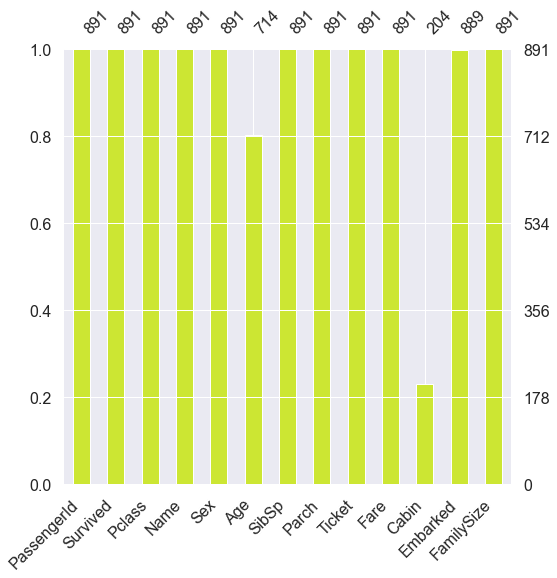

In [104]:
msno.bar(df=df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.9, 0.2))
    # Train set 바그래프 출력
    # 이외 위와 동일한 함수로 구성

<AxesSubplot:>

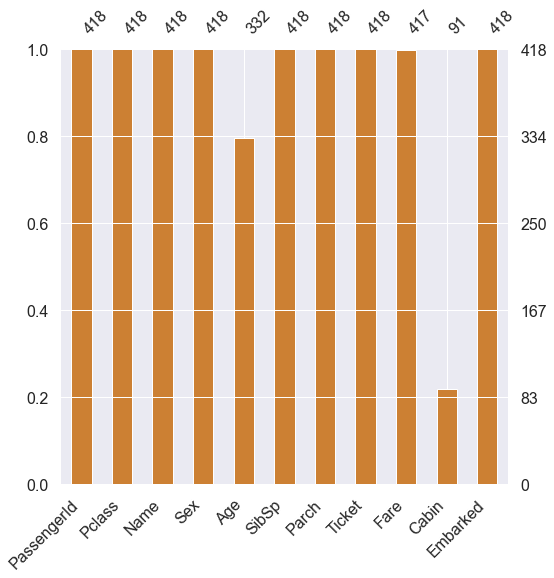

In [75]:
msno.bar(df=df_test.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))
    # Test set 바그래프 출력
    # 위의 함수에서 'test'만 상이

### 1.2 Target label 확인
#### Target label의 분포 확인 필요
#### 해당 건과 같은 binary classification 문제의 경우, 1과 0의 분포에 따라 모델 평가 방법 상이해짐

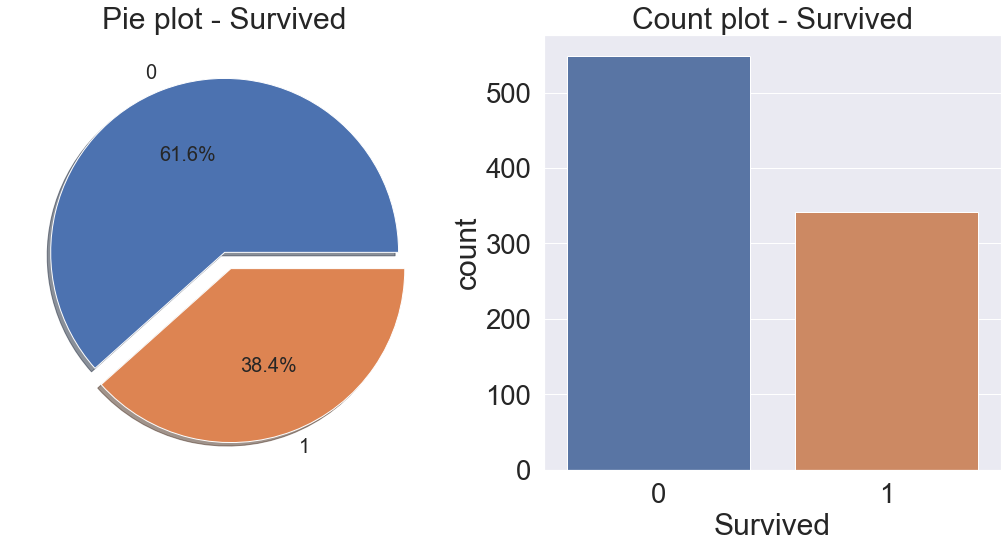

In [76]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
    # matplotlib 사용
    # f = figure
    # subplot(): 하나의 figure 내 여러개 그래프 생성하는 기능
    # plt.subplot(행의 수, 열의 수, 그래프 크기(가로, 세로))
    # figsize 그래프 크기

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%.1f%%', ax = ax[0], shadow = True, fontsize = 20)
    # value_counts(): 유일한 값 별로 개수 세기
    # .pie (explode = 두 조각 간 거리, autopct = autopercent, %1.1%% 소수점 한자리까지 표시, showdow = 그림자)
    #***궁금한 점: autopct 상  %1.1%% 는 정해진 포맷인가? .1과 동일한 결과값
    # ax = 리스트, ax[그래프#]로 생성한 그래프의 위치 지정
    # fontsize도 추가 가능!! 눈이 침침
ax[0].set_title('Pie plot - Survived')
   # 0번 그래프 제목
ax[0].set_ylabel('')
    # 0번 그래프 y축 이름
sns.countplot('Survived', data=df_train, ax = ax[1])
    # seaborn의 countplot: 항목별 개수 세어줌; 자동으로 해당 열을 구성하는 값을 구분하여 그래프 생성
ax[1].set_title('Count plot - Survived')
    # 1번 그래프 제목
    
plt.show()
    # 화면에 표시, 주피터 상에서는 해당 구문 없이도 출력됨

#### Survived = 38.4%
#### Target label 분포 비교적 균일
#### 불균일한 경우, 예) 100 중 1이 99개 / 0이 1개인 경우 --> 정확도 99%

## 2. Exploratory data analysis
#### 데이터 분석을 위한 시각화 필요
#### 시각화 라이브러리 = matplotlib, seaborn, plotly 등

### 2.1 Pclass
#### Ordinal, 서수형 데이터
#### 카테고리, 순서 존재
#### Pclass에 따른 생존률 차이 확인 예정 > 엑셀 피벗과 유사한 작업 > pandas dataframe의 groupby 사용
#### pandas pivot도 존재
#### 'Pclass' 'Survived' 가져와 Pclass로 묶기 > Pclass 별 0, 1 count의 평균 > Pclass 별 생존률

In [7]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()
    # pandas의 groupby 함수 사용
    # 확인하고자 하는 2개의 features 입력 Pclass, Survived
    # 기준이 되는 feature (=Pclass itc) 를 groupby에 입력
    # as_index = True: groupby 내 입력한 그룹 인덱스 지정 여부, Pclass를 인덱스로 지정함 
    # count(): feature(=Pclass) 내 각 카테고리 (=1, 2, 3) 별 인원수 카운트, 총 인원 수

,Survived
Pclass,
1,216
2,184
3,491


In [8]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).sum()
    # sum(): Survied의 경우 0 Not Survived 와 1 Survied 로 나누어짐
    # sum() 값으로 해당 열의 합을 구할 시 총 생존인원 수 확인 가능

,Survived
Pclass,
1,136
2,87
3,119


#### pandas의 crosstab 사용하여 위 과정 보다 수월하게 확인

In [9]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')
    # pandas의 crosstab (교차알림표): 요인 별 교차분석 진행하여 행/열 요인 기준 별 빈도 카운트하여 도수분포표, 교차표 생성
    # pd.crosstab(index = Pclass, column = Survived, margins = True 지정 시 행/열 소계값 함께 산출)
    # style.background_gradient(cmap='summer_r') 배경 색 지정 파라미터

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### grouped 객체에 mean() 확인 시 각 클래스별 생존율 확인 가능

In [107]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

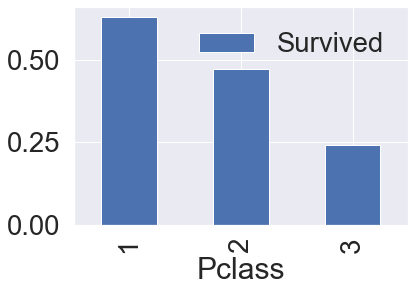

In [81]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()
    # plot.bar(): 위 mean() 값을 바 그래프로 생성
    # sort_values(by = 'Survived', ascending = False): 생존률 내림차순으로 정렬df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

#### 높은 Pclass > 높은 생존률
#### seaborn의 countplot 사용, 특정 label에 따른 개수 확인 가능

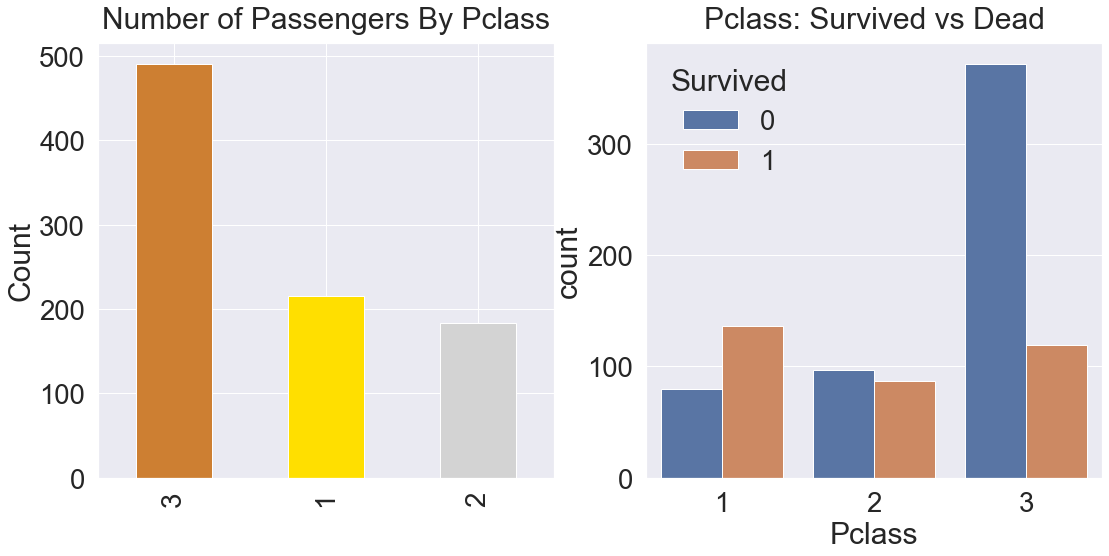

In [82]:
y_position = 1.02
    # 제목과 그래프 간 간격 조정하는 상수 값, 제목의 y축 값을 의미
f, ax = plt.subplots(1, 2, figsize = (18,8))
    # figure(그래프)에 대해 plt.subplots(행의 수, 열의 수, 그래프 크기)
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
    # ax[0] 첫번째 그래프 > Pclass 총 인원에 대한 바 그래프
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
    # ax[0] 첫번째 그래프 제목 설정, 위 설정한 y_position 값 입력
ax[0].set_ylabel('Count')
    # ax[0] 첫번째 그래프의 y축 레이블 입력
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
    # 항목 별 개수 세는 countplot
    # hue 옵션으로 바 구분 세팅 (itc, Survived 상 0과 1 나누어 구분됨)
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
    # ax[1] 두번째 그래프의 제목 설정, 위 설정한 y_position 값 입력
plt.show()

#### 높은 Pclass (작은 class #) > 높은 생존률 확인
#### Pclass 1, 2, 3 = 63%, 48%, 25%
#### Pclass가 생존에 큰 영향을 미치는 것으로 추론 가능
#### 추후 모델 생성 시 해당 feature 를 사용하는 것에 대해 긍정적인 판단

### 2.2 Sex
#### 성 별로 생존율 확인
#### pandas의 groupby와 seaborn의 countplot 사용하여 시각화

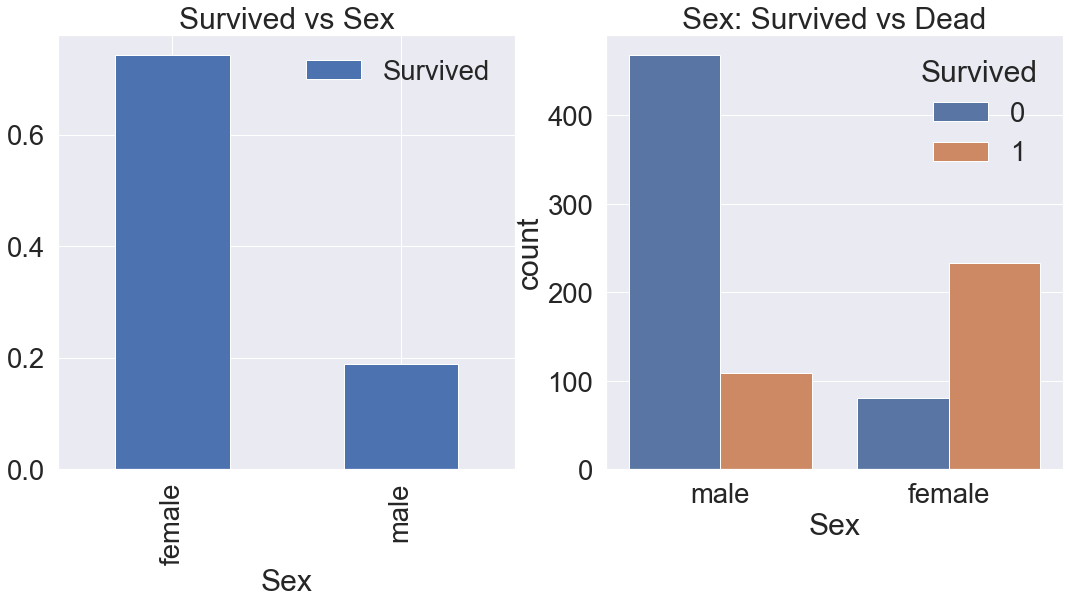

In [83]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
    # 그래프 생성; plt.subplot(행의 수, 열의 수, 그래프 크기)
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
    # Train set의 Sex와 Survived를 열 값으로 배치, Sex.mean() 기준 groupby 및 인덱스 지정
    # plot.bar() 바그래프 생성
ax[0].set_title('Survived vs Sex')
    # ax[0] 첫번째 그래프 제목 설정
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
    # ax[1] 두번째 그래프 생성; Sex 열의 카테고리 별 정리 세팅 (hue) 된 countplot 작성
ax[1].set_title('Sex: Survived vs Dead')
    # ax[1] 두번째 그래프 제목 설정
plt.show()

#### 생존률, 여자 > 남자

In [84]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
    # Sex, Survived.mean()에 대하여 Sex로 groupby한 테이블 생성
    # 해당 테이블은 인덱스 지정 x, 인덱스 지정 시 (as_index = True) 0 1 열 사라지므로 크게 관계 없음
    # 내림차순 정렬

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [29]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### Pclass와 동일한 맥락으로 Sex 또한 예측 모델에 사용될 중요한 feature로 확인

### 2.3 Both Sex and Pclass
#### Sex, Pclass 2개의 feature 관련, 생존율 차이 확인
#### seaborn의 factorplot 이용, 3개의 차원으로 이루어진 그래프 생성

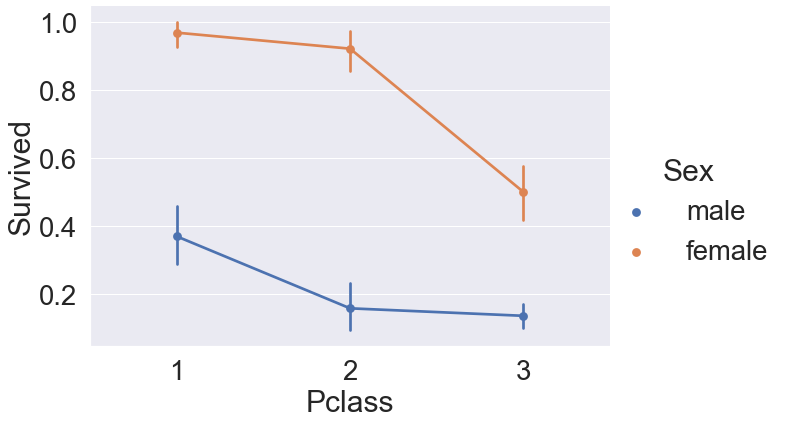

In [85]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size=6, aspect = 1.5)
    # sns.factorplot(x, y, hue, dataframe, 그래프 형식 지정)

#### 모든 클래스 생존율, 여자 > 남자
#### 성별 관계없이 높은 클래스 - 높은 생존율

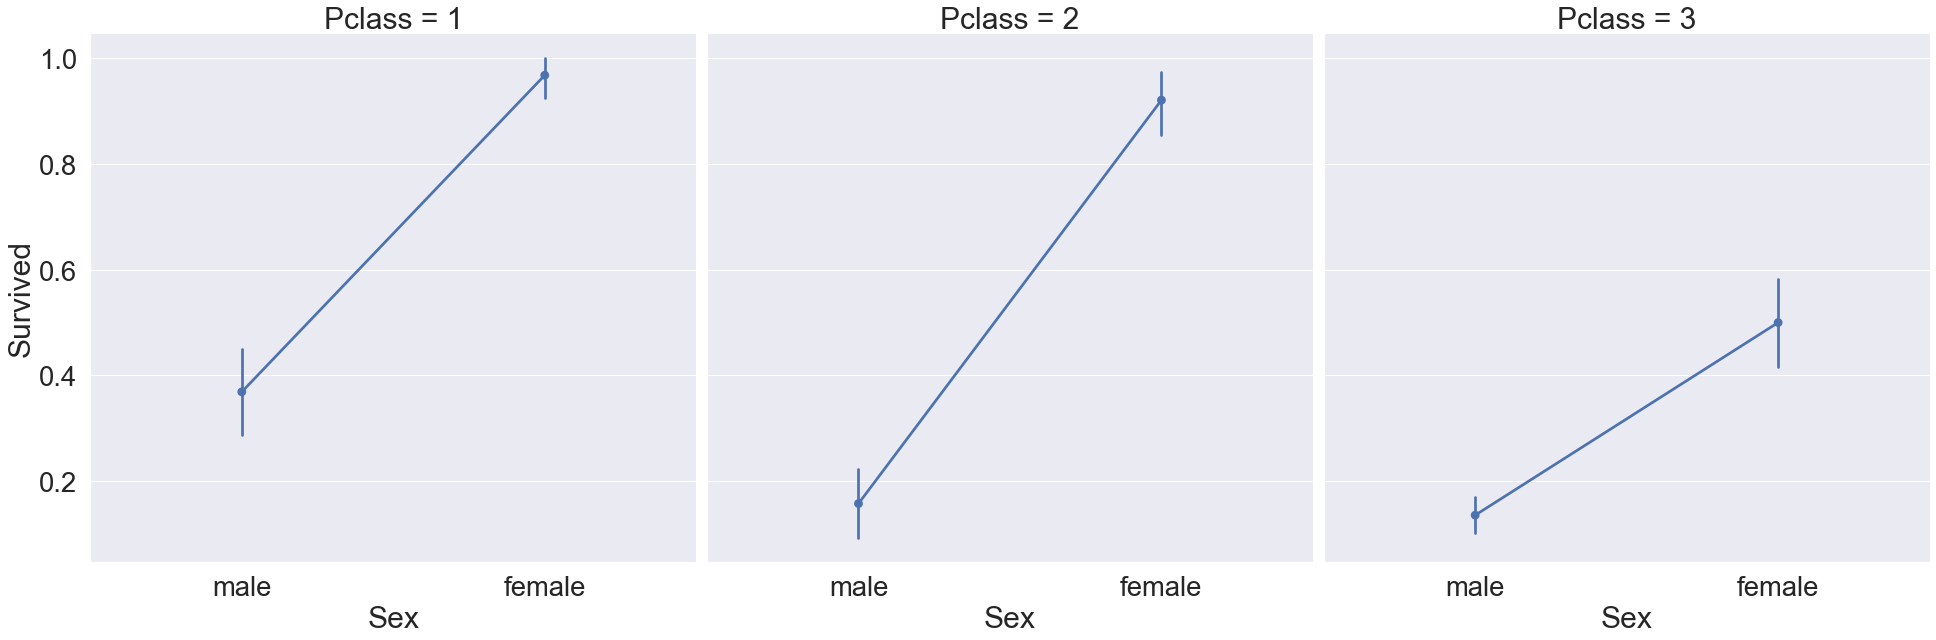

In [86]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train, satureation = .5, size = 9, aspect = 1)
    # 각 Pclass 별 Sex, Survived에 대한 생존률 그래프 생성

### 2.4 Age

In [87]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))
    # {:.1f} 소수점 자리 설정
    # f = floating point
    # .number 자리에서 반올림

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


#### 생존에 따른 Age의 히스토그램

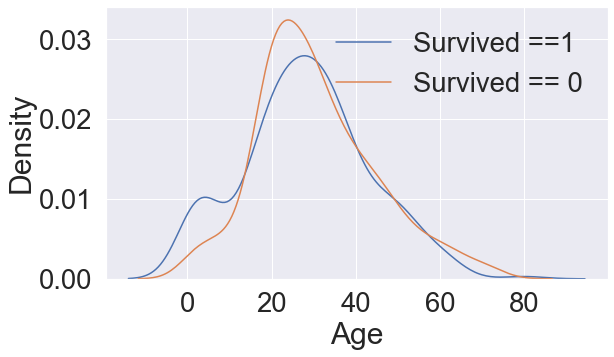

In [88]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
    # 그래프 생성; plt.subplots(행의 수, 열의 수, 그래프 크기)
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
    # KDE:
    # - Kernel Density Estimator
    # - 커널함수를 이용하여 밀도를 추정하는 방법
    # - 히스토그램의 문제를 개선, 부드러운 곡선 형태로 변화하여 그래프 생성
    # - https://darkpgmr.tistory.com/147 참조
    # sns.kdeplot(데이터셋(조건), 그래프의 위치)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived ==1', 'Survived == 0'])
    # plt.legend(): 그래프 상 범례 표시 (각 그래프 상 데이터 종류를 표시하기 위한 텍스트)
plt.show()

#### 생존자, 적은 나이 > 많은 나이

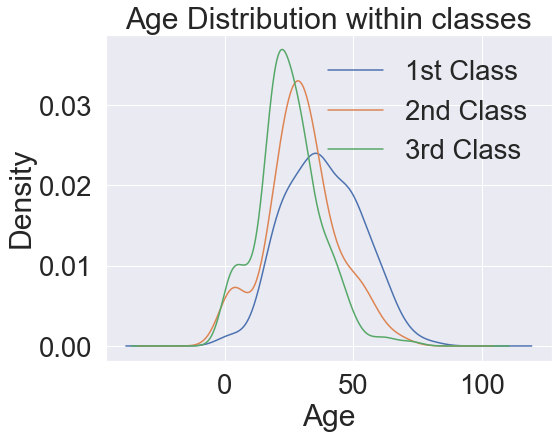

In [90]:
# Age distribution within classes
plt.figure(figsize = (8, 6))
    # 1개의 그래프 생성; plt.figure(그래프 크기)
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')
    # plot(kind = 'kde') vs.sns.kdeplot()
    # - 기존 곡선 그래프에 plot(kind = 'kde') 추가하여 kdeplot 생성
    # - sns.kdeplot로 직접 kdeplot 생성
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

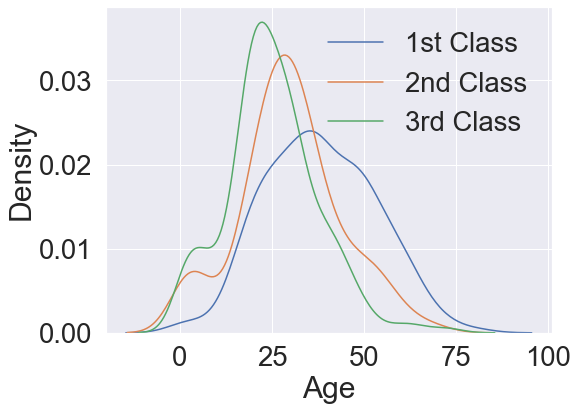

In [91]:
    # - sns.kdeplot로 직접 kdeplot 생성 (위와 동일한 그래프)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass'] == 2]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass'] == 3]['Age'], ax=ax)

plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

#### 높은 Pclass = 나이 많은 사람의 비중 큼
#### 나이대 변화에 따른 생존률 관찰 예정
#### 나이범위 확장 > 생존율 변화 관찰

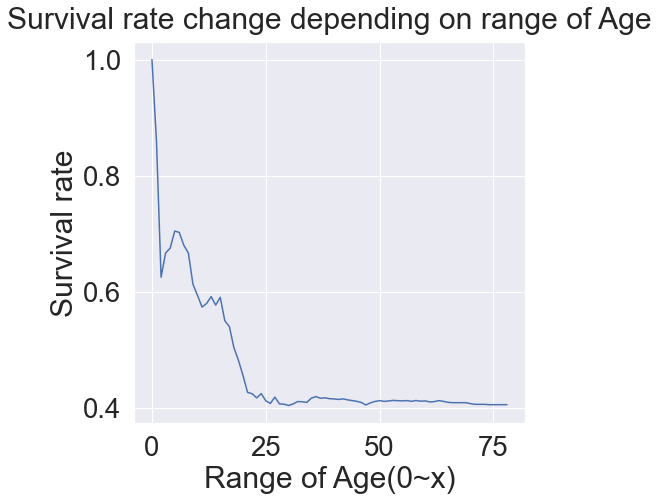

In [92]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    # for 문
    # Age < i 일때, Survived.sum() / Age <i 일때, Age별 인원 수? 로 나이별 생존률 계산
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

#### 어린 나이 - 높은 생존률
#### Age 중요한 feature로 사용 가능 확인

### 2.5 Pclass, Sex, Age
#### Sex, Pclass, Age, Survived 모두에 대해 확인 희망 > seaborn의 violinplot
#### x축 = 나눠서 보고자 하는 case(=Pclass, Sex)
#### y축 = 분포(Age)

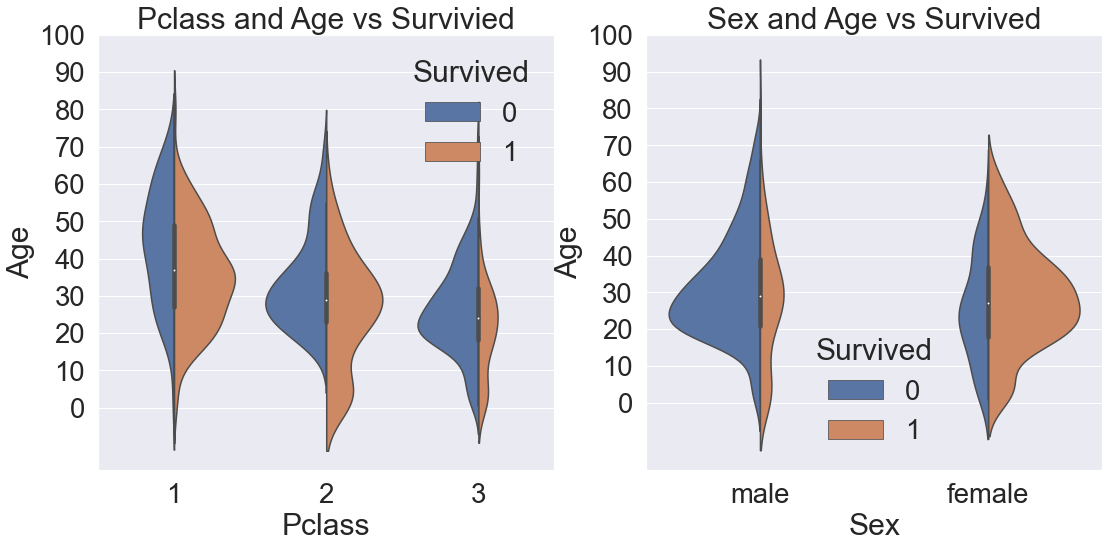

In [93]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax=ax[0])
    # sns.violinplot: 데이터셋의 분포 시각화
    # - 중심선을 따라 대칭인 KDE 플롯
    # - 가운데 흰색 점 = 중앙값(median)
    # - 중앙 두꺼운 선 = 사분위 범위
    # - 중앙 얇은 선 = 신뢰 구간 (bar plot과 동일하게 95% 신뢰 구간 표시)
    # = KDE 플롯 + Box 플롯
ax[0].set_title('Pclass and Age vs Survivied')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### 왼쪽 그래프: Pclass 별 Age 분포의 차이를 생존 여부에 따라 구분
#### 오른쪽 그래프: Sex, 생존에 따른 분포 차이
#### 모든 Pclass, 어릴수록 높은 생존률
#### 여성과 아이의 높은 생존률

### 2.6 Embarked
#### Embarked = 탑승 항구
#### 탑승 장소에 따른 생존률 확인

<AxesSubplot:xlabel='Embarked'>

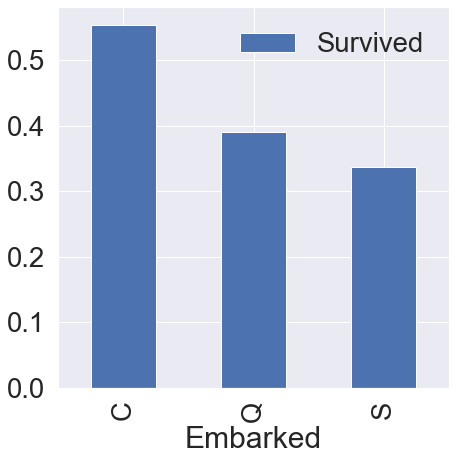

In [94]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)
    # Embarked, Surived.mean()에 대해 Embarked로 groupby 한 바 그래프 생성

#### 대체로 비슷하나, C에서 가장 높은 생존율
#### 사용 예정
#### 모델 생성 후, 각 feature의 중요도 확인 가능 > 추후 모델 생성 후 관찰 예정
#### 다른 feature로 split 하여 확인

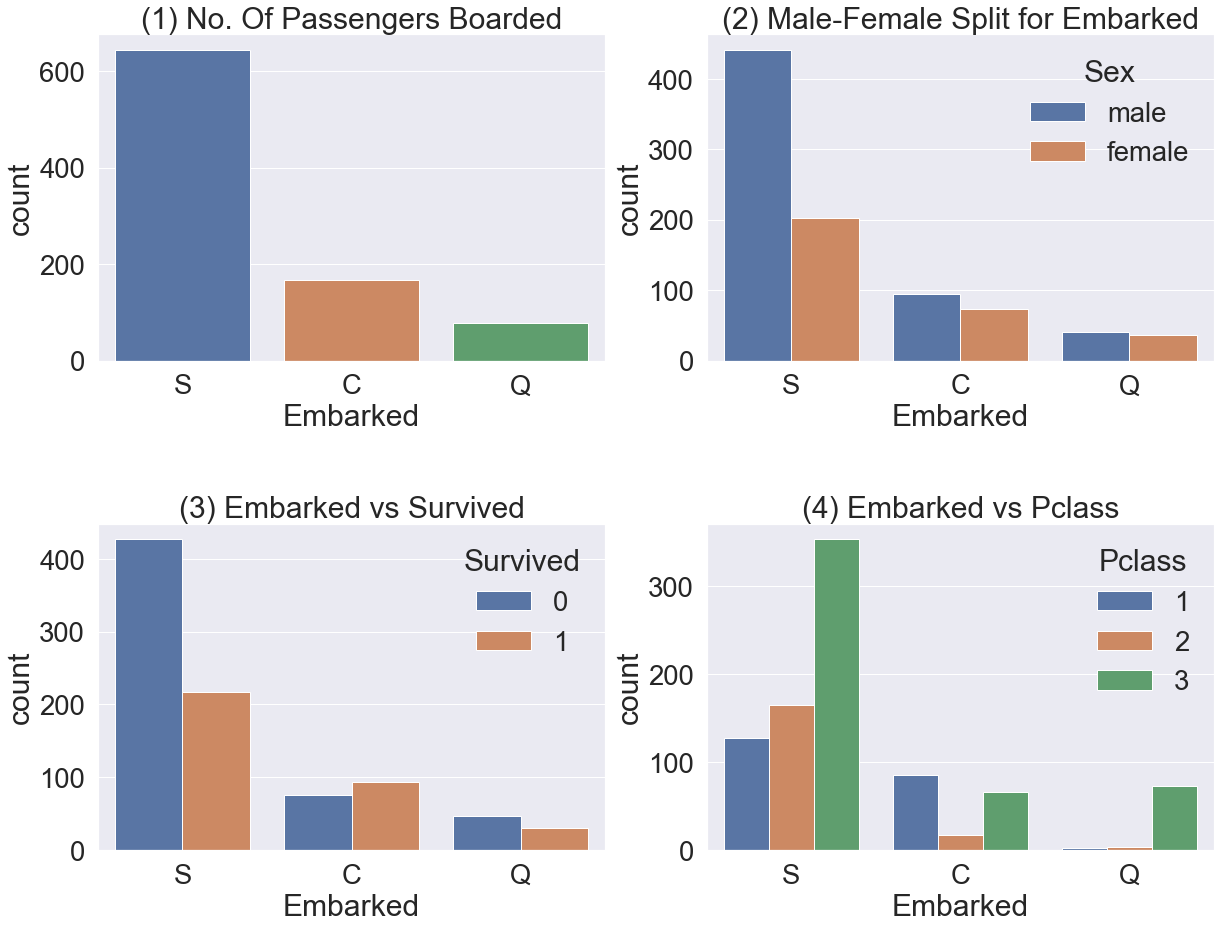

In [95]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = df_train, ax = ax[0,0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    # wspace: 서브 플롯 간 간격 위해 너비 비율 조절
    # hspace: 서브 플롯 간 간격 위해 높이 비율 조절
plt.show()

#### F1 - S에 최다 탑승객수
#### F2 - C & Q에 비슷한 남녀 비율, S에 높은 남자 비율
#### F3 - S, 매우 낮은 생존률
#### F4 - Class로 나누어 보니, C의 높은 생존률은 높은 Pclass 때문 / S는 낮은 Pclass로 낮은 생존률 발생

### 2.7 Family = SibSp (형제 자매) + Parch(부모 자녀)

In [96]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
    # 본인 포함하기 위해 +1

In [97]:
print("Max size of Fam: ", df_train['FamilySize'].max())
print("Min size of Fam: ", df_train['FamilySize'].min())

Max size of Fam:  11
Min size of Fam:  1


#### FamilySize-생존 관계 확인

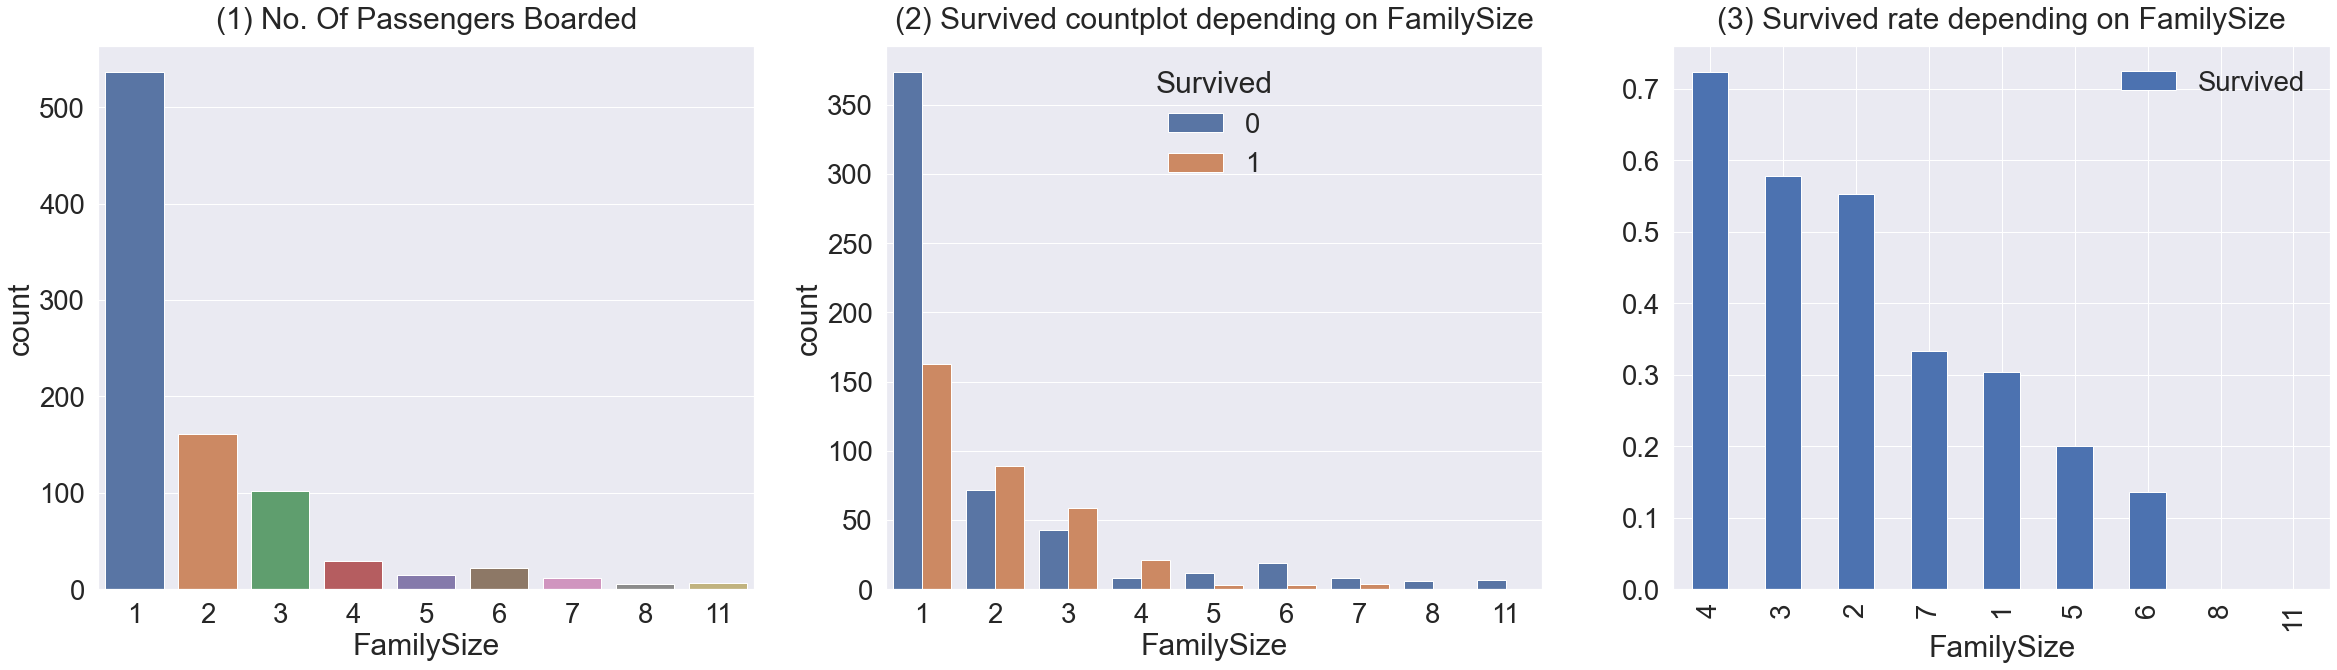

In [98]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

#### F1 - 가족크기 범위 1 - 11, 대부분 1명 - 2명 - 3명 - 4명 순
#### F2 , 3 - 가족 크기에 따른 생존 비교 / 가족 4명, 가장 높은 생존률
#### 가족 수 증가 , 생존률 감소
#### 너무 낮거나 큰 가족수, 생존률 감소
#### 3~4명 선 가장 높은 생존률

### 2.8 Fare
#### Fare = 탑승요금, continuous feature

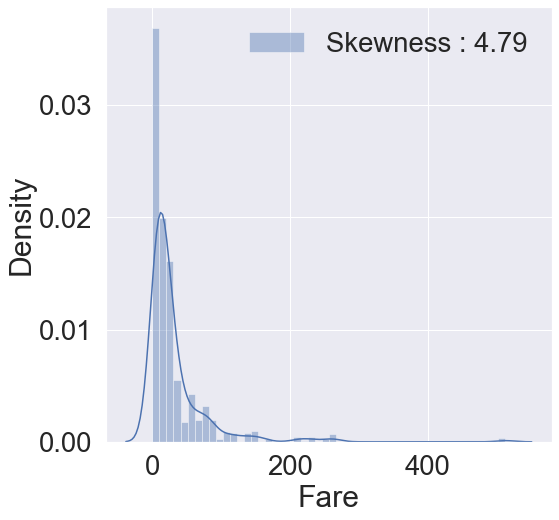

In [100]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
    # sns.distplot: 히스토그램 생성
    #***왜 튜토리얼과 그래프가 정확하게 일치하지 않을까요?!?
    # Skewness: 왜도(비대칭도); 확률변수의 확률분포가 비대칭성을 가지고 있음을 뜻함
    # - a = 0; 정규분포, a < 0; 오른쪽으로 치우침, a < 0; 왼쪽으로 치우침
    # 다시 읽어보기: https://hong-yp-ml-records.tistory.com/28
g = g.legend(loc = 'best')
    # loc = location

In [101]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
    # Test set 상 NaN 값을 평균값으로 치환
    
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

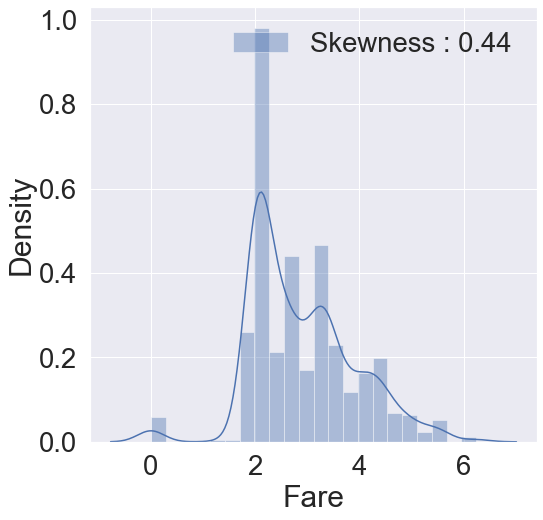

In [102]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

#### log 취한 후, 비대칭성 개선
#### 해당 작업 사용, 모델 성능 향상 가능
#### 해당 작업은 feature engineering에 포함되는 부분
#### Feature engineering: 모델 학습, 모델 성능 향상 목적으로 feature에 다양한 조작 적용/새로운 feature 추가

### 2.9 Cabin
#### 해당 feature 상 NaN ~80%, 생존에 영향을 미칠 중요한 정보 확인 쉽지 않음 --> 모델 상 미포함

In [62]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### 2.10 Ticket
#### 해당 feature 상 NaN 미존재
#### string, 추가 작업 이후 실제 모델에 사용 가능 (아이디어 필요)

In [63]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

#### 다양한 Ticket number